# Heart Failure Prediction using Support Vector Machines (SVM)

Heart failure is a critical medical condition where the heart is unable to pump blood effectively to meet the body’s needs. It remains one of the leading causes of hospitalization and mortality worldwide. Early detection and intervention can significantly improve patient outcomes, making predictive modeling a powerful tool in modern healthcare.

In this project, we will use **Support Vector Machines (SVM)**, a robust supervised learning algorithm, to predict the likelihood of death (mortality) in patients who have experienced heart failure, based on various clinical features.

## **Project Objectives**

1. Build a predictive model using **Support Vector Machines (SVM)** to classify patients based on survival outcome.  
2. Implement an **end-to-end ML pipeline** using Scikit-Learn for efficient preprocessing and model training.  
3. Explore **kernel approximation** (RBF) for large-scale data efficiency.  
4. Perform **hyperparameter tuning** using `GridSearchCV` for optimal performance.  
5. Analyze feature relationships and provide **clinically interpretable insights** from the model.

## 1. Import Libraries

In [20]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

# Ignore warnings for clean output
import warnings

warnings.filterwarnings('ignore')

# Display options
sns.set(style='white')
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'y'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.5

## 2. Load and Preview Dataset

In this project, we will use the [**Heart Failure Clinical Records Dataset**](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data) from Kaggle and take an initial look at its structure.  

In [21]:
# Load dataset
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Preview a few records
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


The first few rows of the dataset give us a clear picture of the available clinical features and how they are structured.  

Each row represents a **unique patient record**, containing a mix of **demographic**, **clinical**, and **laboratory** measurements.  

For instance:
- `age`, `sex`, and `smoking` capture **demographic and lifestyle information**.  
- `ejection_fraction`, `serum_creatinine`, and `serum_sodium` represent **key clinical indicators** of heart function and kidney health.  
- The target variable, **`DEATH_EVENT`**, indicates whether the patient **died (1)** or **survived (0)** during the follow-up period.

In [22]:
# Data information structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


The dataset contains **299 patient records** and **13 clinical features**. All columns have **299 non-null values**, indicating there are **no missing entries**, which simplifies preprocessing.

Most variables are stored as **integers**, representing binary or discrete clinical indicators (e.g., `anaemia`, `diabetes`, `high_blood_pressure`), while a few features such as `age`, `platelets`, `serum_creatinine`, and `serum_sodium` are **continuous numerical measurements**.

In [23]:
# Statistical information
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


The statistical summary provides an overview of the dataset’s numerical distributions:

- The **average patient age** is around **61 years**, with a range from 40 to 95, indicating that most patients are older adults.  
- The **average ejection fraction** (a measure of heart pumping efficiency) is about **38%**, with some patients showing critically low values near 14%.  
- **Serum creatinine** levels range from 0.5 to 9.4 mg/dL, suggesting varying degrees of kidney function across patients.  
- The wide standard deviation in **creatinine phosphokinase (CPK)** indicates extreme variations in enzyme levels — some patients had acute muscle or cardiac injury.

Overall, the data appears numerically consistent and covers realistic clinical ranges for heart failure patients.


## 2. Exploratory Data Analysis (EDA)

Before training our Support Vector Machine (SVM) model, it’s essential to thoroughly explore the dataset to gain both **statistical** and **clinical insights**. EDA helps us understand how different features behave, how they relate to each other, and how they influence the target variable `DEATH_EVENT`.

Through this section, we aim to:

1. **Understand feature distributions** — Identify the spread and patterns of key clinical measurements such as age, ejection fraction, and serum creatinine.  
2. **Examine class balance** — Check whether the target variable (`DEATH_EVENT`) is balanced or imbalanced, which affects model training and evaluation.  
3. **Analyze correlations** — Discover relationships between clinical features (e.g., kidney function and heart performance indicators).  
4. **Visualize survival patterns** — Use plots to observe how features differ between patients who survived and those who did not.

### 2.1. Distribution of Target Variable (`DEATH_EVENT`)

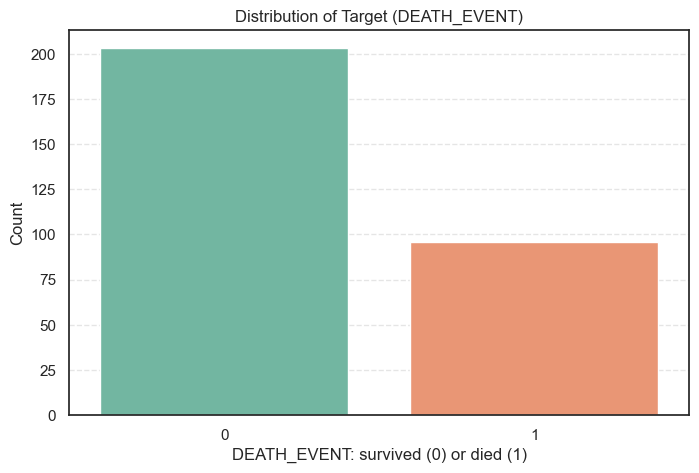

In [24]:
# Plot the target distribution
sns.countplot(data=data, x='DEATH_EVENT', palette='Set2')
plt.title('Distribution of Target (DEATH_EVENT)')
plt.xlabel('DEATH_EVENT: survived (0) or died (1)')
plt.ylabel('Count')
plt.show()

In [25]:
# Calculate classes count
data['DEATH_EVENT'].value_counts().to_frame(name='Count').assign(
    Percent=lambda x: round((x['Count'] / x['Count'].sum()) * 100, 2))

,Count,Percent
DEATH_EVENT,,
0,203,67.89
1,96,32.11


From the plot and value counts:
- **203 patients (≈ 68%)** survived.  
- **96 patients (≈ 32%)** passed away.  

This shows that the dataset is **moderately imbalanced**, with more survivors than deaths.  

While this imbalance isn’t extreme, it’s important to be aware of it since models like SVM can be sensitive to class imbalance.  

Later in the modeling phase, we can consider techniques such as **class weighting** (`class_weight='balanced'`) to ensure fair learning between both classes.

### 2.2. Univariate Analysis of Features

In this section, we will explore the **individual behavior of each feature** (univariate analysis) to understand their distributions and potential clinical significance.

We’ll examine both **continuous** and **categorical** variables:
- **Continuous features:** `age`, `ejection_fraction`, `serum_creatinine`, `serum_sodium`, `platelets`, and `creatinine_phosphokinase`.  
- **Categorical/binary features:** `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`.

Visualizing these features will help us detect outliers, skewness, and potential clinical trends before we move into bivariate and correlation analyses.

In [26]:
# Separate continuous features from the categorical features
continuous_feat = [col for col in data.columns if data[col].nunique() > 10 and col != 'DEATH_EVENT']
categorical_feat = [col for col in data.columns if col not in continuous_feat and col != 'DEATH_EVENT']
print("Categorical Features:", categorical_feat)
print("Continuous Features:", continuous_feat)

Categorical Features: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
Continuous Features: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


#### 2.2.1. Categorical Features Analysis

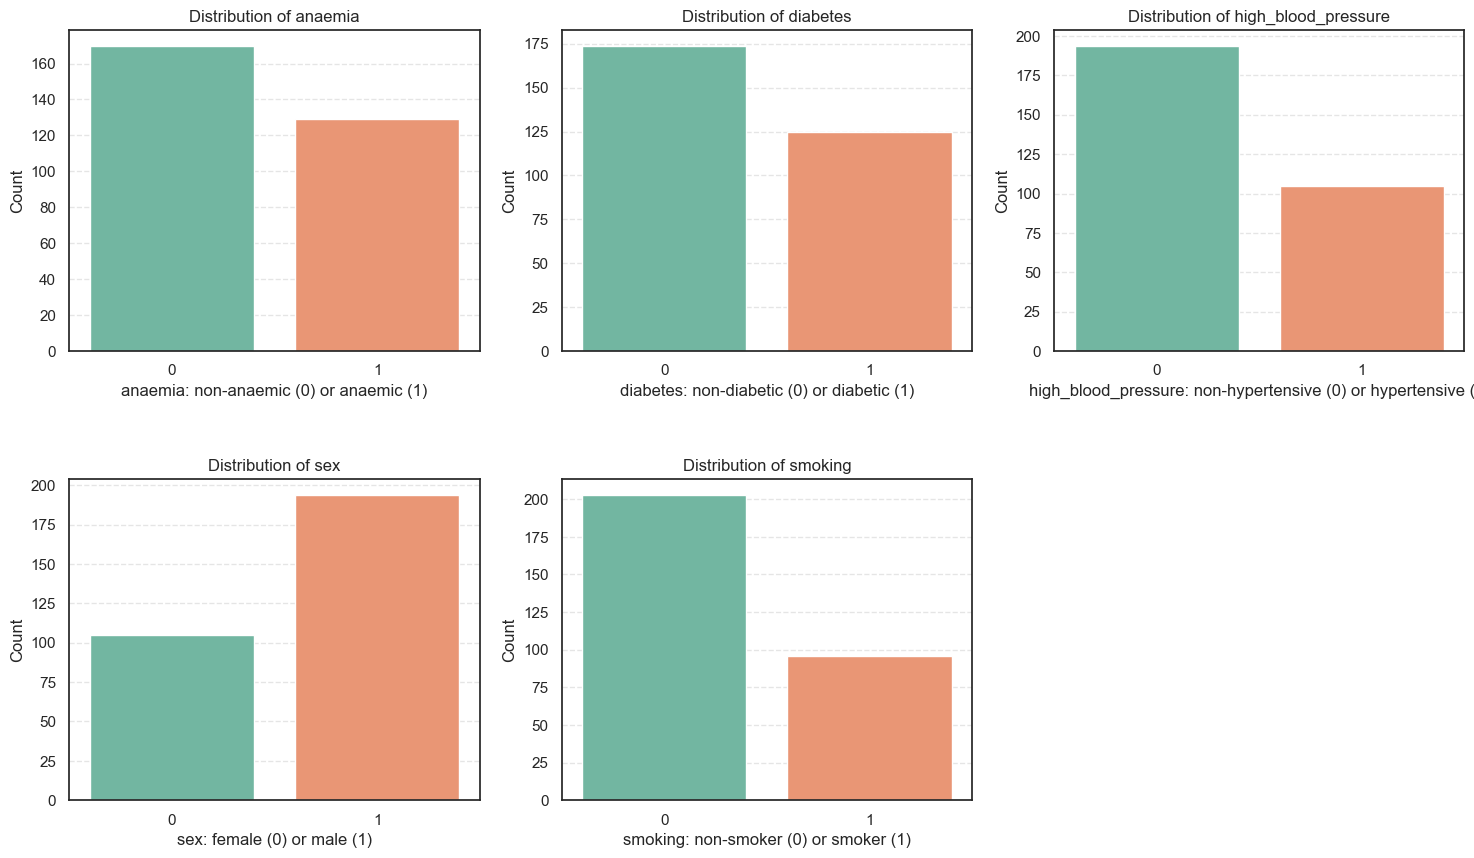

In [27]:
desc_dict = {
    'anaemia': ('non-anaemic', 'anaemic'),
    'diabetes': ('non-diabetic', 'diabetic'),
    'high_blood_pressure': ('non-hypertensive', 'hypertensive'),
    'sex': ('female', 'male'),
    'smoking': ('non-smoker', 'smoker'),
}

# Plot distribution of categorical features
plt.figure(figsize=(18, 10))
for i, col in enumerate(categorical_feat, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=data, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}: {desc_dict[col][0]} (0) or {desc_dict[col][1]} (1)')
    plt.ylabel('Count')
plt.subplots_adjust(hspace=0.4)
plt.show()

In [28]:
# Calculate classes count
for col in categorical_feat:
    count = data[col].value_counts().to_frame(name='Count').assign(
        Percent=lambda x: round((x['Count'] / x['Count'].sum()) * 100, 2))
    print(f'=== {col} ===')
    print(count, '\n')

=== anaemia ===
         Count  Percent
anaemia                
0          170    56.86
1          129    43.14 

=== diabetes ===
          Count  Percent
diabetes                
0           174    58.19
1           125    41.81 

=== high_blood_pressure ===
                     Count  Percent
high_blood_pressure                
0                      194    64.88
1                      105    35.12 

=== sex ===
     Count  Percent
sex                
1      194    64.88
0      105    35.12 

=== smoking ===
         Count  Percent
smoking                
0          203    67.89
1           96    32.11 



From the distributions of categorical features, we can observe several key insights about the patient population:

- **Anaemia:** Around **43%** of patients are anaemic, while **57%** are not. Anaemia can indicate reduced oxygen-carrying capacity of the blood, which may worsen heart conditions.
- **Diabetes:** Approximately **42%** of the patients are diabetic. Diabetes is a known risk factor for heart disease and heart failure.
- **High Blood Pressure:** About **35%** of the patients have hypertension, while **65%** do not. High blood pressure is another critical risk factor for heart failure.
- **Sex:** The dataset consists of **65% males** and **35% females**, showing a higher male representation in this study.
- **Smoking:** Around **32%** of the patients are smokers, compared to **68%** who do not smoke. Smoking is known to contribute significantly to cardiovascular complications.

Overall, these distributions show that most patients in the dataset are **male, non-smokers, non-hypertensive, and non-diabetic**, though a substantial proportion still exhibits conditions that elevate heart failure risk.

#### 2.2.2. Continuous Features Analysis

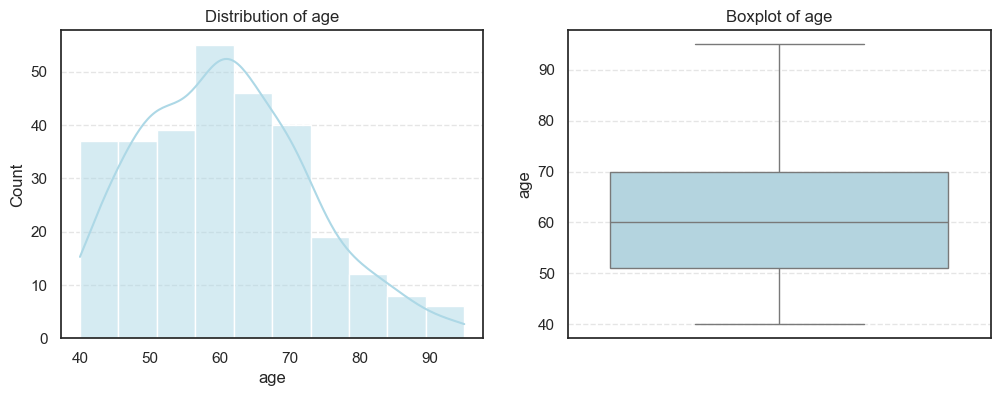

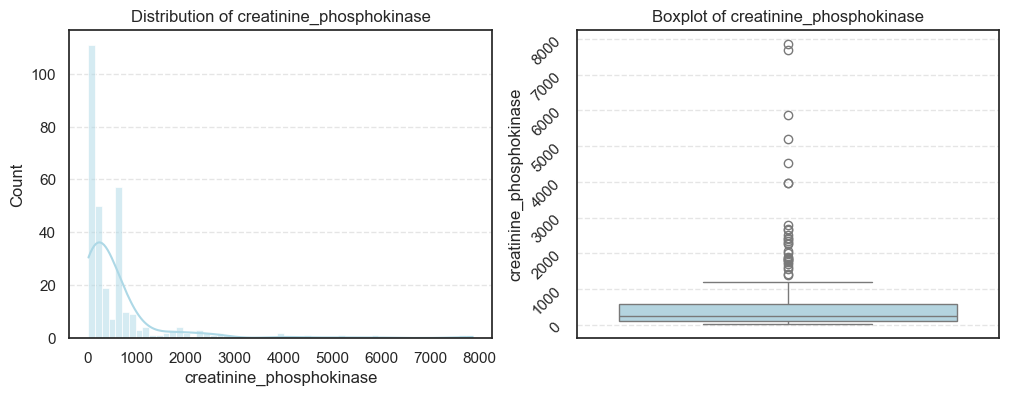

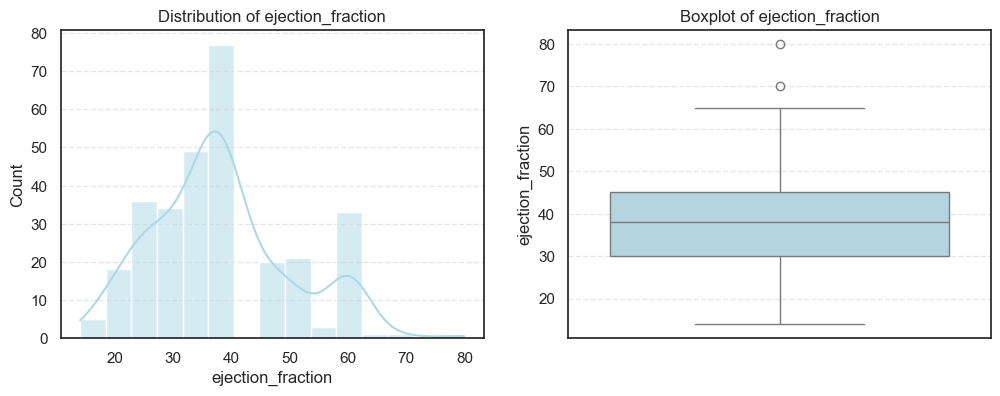

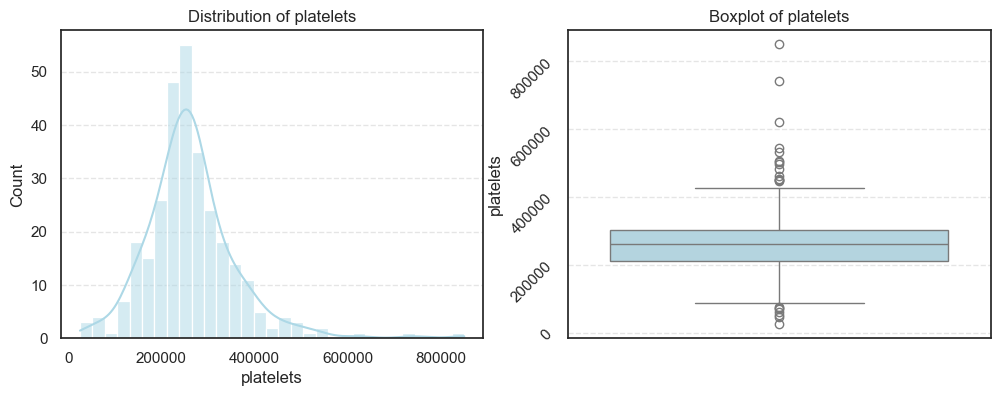

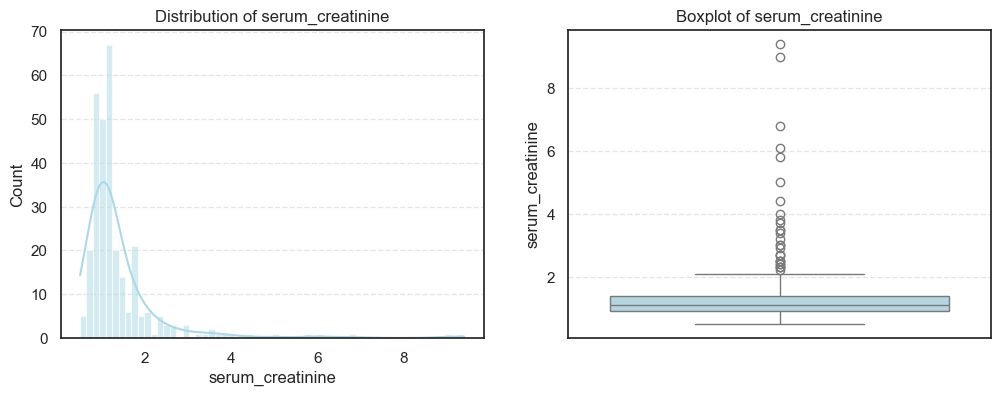

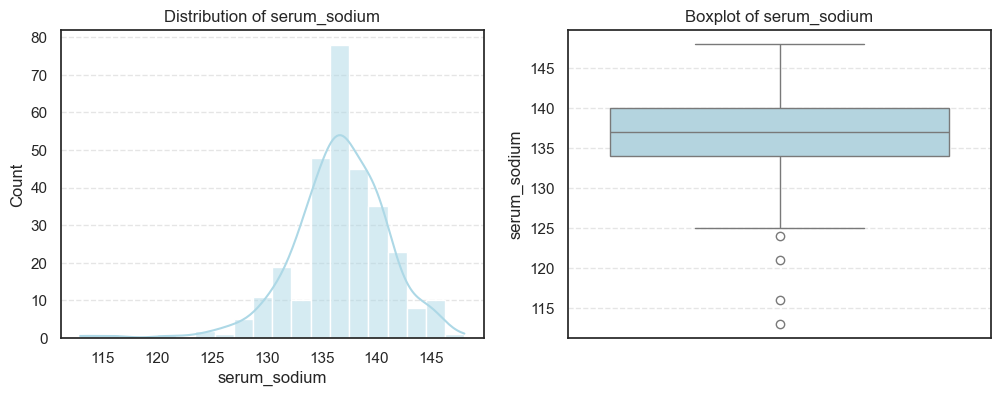

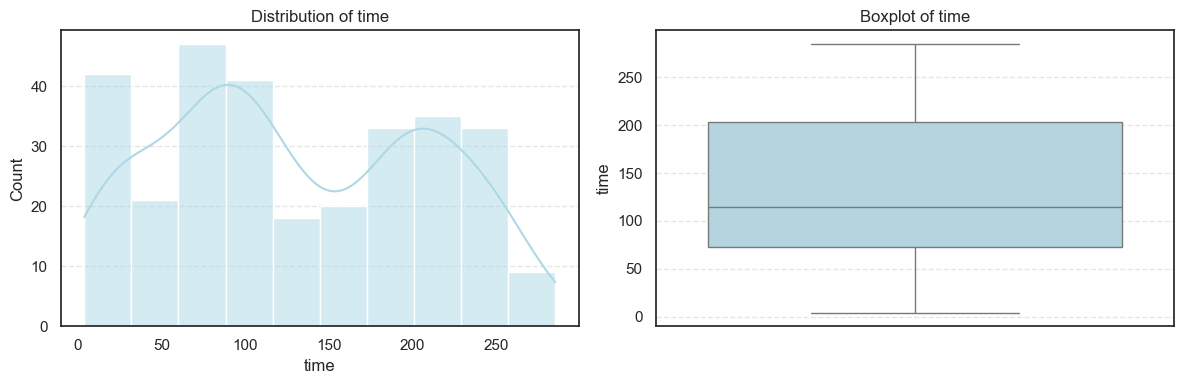

In [29]:
# Plot distribution of categorical features
for col in continuous_feat:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=data, x=col, kde=True, color='lightblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=data, y=col, color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

    if col in ['creatinine_phosphokinase', 'platelets']:
        plt.yticks(rotation=45)

plt.tight_layout()
plt.show()

In [30]:
# Checking for skew and outliers
for col in continuous_feat:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - iqr * 1.5
    upper = q3 + iqr * 1.5
    outliers = data[(data[col] < lower) | (data[col] > upper)][col]
    print(f'=== {col} ===')
    print("Outliers:", len(outliers))
    print("Skew:", data[col].skew(), '\n')

=== age ===
Outliers: 0
Skew: 0.42306190672863536 

=== creatinine_phosphokinase ===
Outliers: 29
Skew: 4.463110084653752 

=== ejection_fraction ===
Outliers: 2
Skew: 0.5553827516973211 

=== platelets ===
Outliers: 21
Skew: 1.4623208382757793 

=== serum_creatinine ===
Outliers: 29
Skew: 4.455995882049026 

=== serum_sodium ===
Outliers: 4
Skew: -1.0481360160574988 

=== time ===
Outliers: 0
Skew: 0.12780264559841184 



From the distribution plots and statistical analysis of continuous features, we can make the following observations:

- Most features such as `age`, `ejection_fraction`, and `time` appear approximately symmetric with low skewness, indicating a fairly balanced distribution of values.
- Features like `creatinine_phosphokinase` and `serum_creatinine` show **strong positive skewness** with several extreme values (outliers). This suggests that a small number of patients have unusually high enzyme or creatinine levels — potentially those with severe heart or kidney issues.
- `Platelets` also exhibit moderate skewness and contain some outliers, while `serum_sodium` shows a slight **negative skew**, meaning most patients have relatively high sodium levels but a few have lower values.
- Overall, the dataset contains a few features with **long-tailed distributions and notable outliers**, which is common in medical data due to physiological differences and disease severity. These characteristics should be handled carefully during model training, possibly through transformation or scaling techniques.

### 2.3. Bivariate Analysis of Features vs Target

In this section, we explore how each feature is related to the target variable `DEATH_EVENT`, which indicates whether a patient survived (0) or died (1) during the follow-up period.  

Bivariate analysis helps us understand which factors may have a stronger influence on patient survival outcomes.

We will analyze:
- **Categorical features** (e.g., anaemia, diabetes, smoking) — by comparing survival rates across their classes.  
- **Continuous features** (e.g., age, ejection fraction, serum creatinine) — by visualizing their distributions across survival outcomes.

This step provides valuable insights into the relationships within the dataset and guides feature selection and model expectations.

#### 2.3.1. Categorical Features vs Target (`DEATH_EVENT`) Analysis

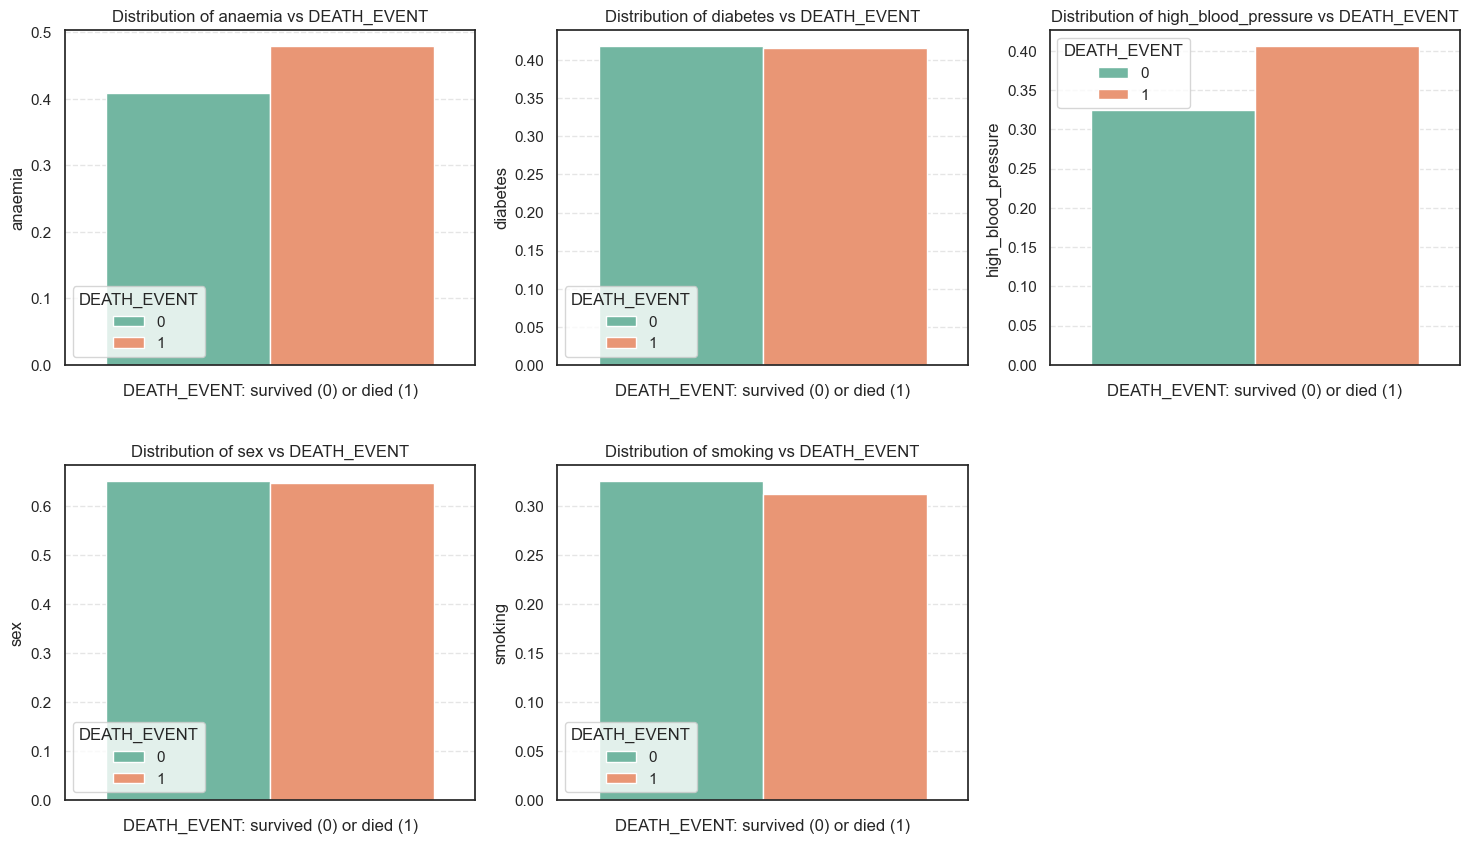

In [31]:
# Plot categorical features vs target variable (DEATH_EVENT)
plt.figure(figsize=(18, 10))
for i, col in enumerate(categorical_feat, 1):
    plt.subplot(2, 3, i)
    sns.barplot(data=data, y=col, hue='DEATH_EVENT', ci=False, palette='Set2', estimator='mean')
    plt.title(f'Distribution of {col} vs DEATH_EVENT')
    plt.xlabel('DEATH_EVENT: survived (0) or died (1)')
    plt.ylabel(col)
plt.subplots_adjust(hspace=0.3)
plt.show()

In [32]:
# Display survival/death averages for each category feature
category_feat_mean = data.groupby('DEATH_EVENT')[categorical_feat].mean().T
round(category_feat_mean, 2)

DEATH_EVENT,0,1
anaemia,0.41,0.48
diabetes,0.42,0.42
high_blood_pressure,0.33,0.41
sex,0.65,0.65
smoking,0.33,0.31


The plots and summary statistics above show how each categorical feature relates to patient survival outcomes (`DEATH_EVENT`).

- **Anaemia:** Patients with anaemia show a slightly higher mortality rate (48%) compared to those without anaemia (41%), suggesting anaemia may be a mild risk factor.
- **Diabetes:** Mortality rates are identical (42%) for both diabetic and non-diabetic patients, indicating diabetes alone may not strongly influence death outcomes in this cohort.
- **High Blood Pressure:** Patients with hypertension have a higher death rate (41%) than those without (33%), aligning with known cardiovascular risks.
- **Sex:** Mortality appears consistent across males and females (65% male in both cases), suggesting no strong gender bias in survival.
- **Smoking:** The mortality rate among smokers (31%) is slightly lower than non-smokers (33%), which might be due to confounding effects or sample size imbalance rather than a protective effect.

Overall, **anaemia** and **high blood pressure** show the most noticeable association with mortality, while **diabetes**, **sex**, and **smoking** appear to have minimal direct influence.

#### 2.3.2. Continuous Features vs Target (`DEATH_EVENT`) Analysis

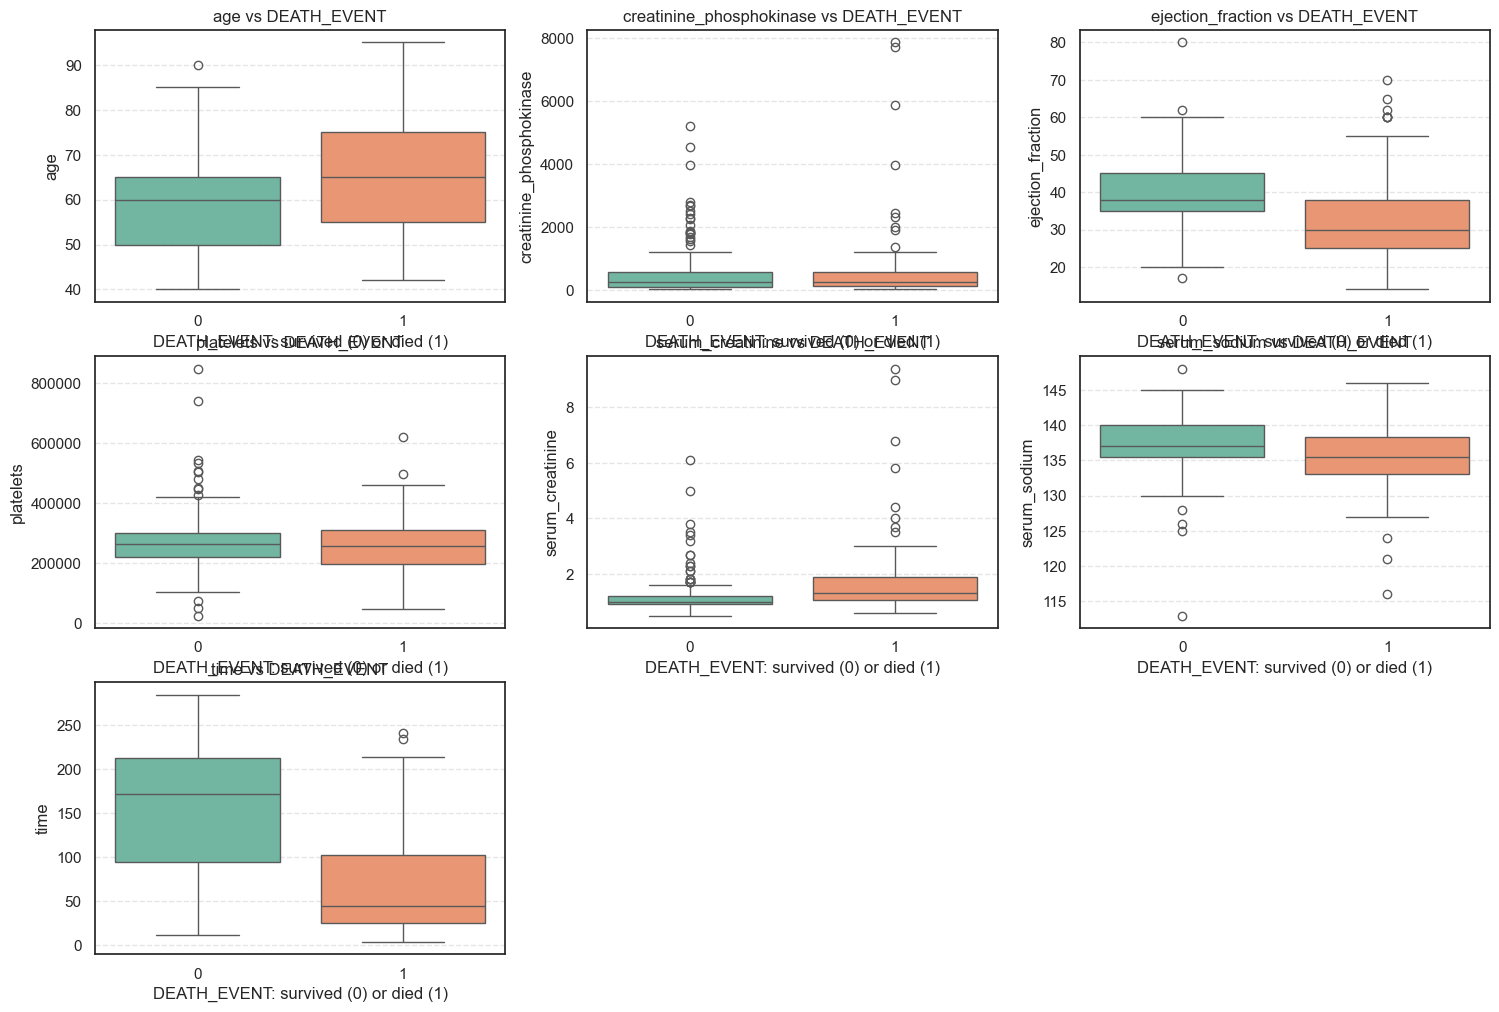

In [33]:
# Plot continuous features vs target variable (DEATH_EVENT)
plt.figure(figsize=(18, 12))
for i, col in enumerate(continuous_feat, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, x='DEATH_EVENT', y=col, palette='Set2')
    plt.title(f'{col} vs DEATH_EVENT')
    plt.xlabel('DEATH_EVENT: survived (0) or died (1)')
    plt.ylabel(col)
plt.show()

In [34]:
# Display survival/death statistical information for each continuous feature
for col in continuous_feat:
    col_mean = data.groupby('DEATH_EVENT')[col].describe().T
    print(f'=== {col} vs DEATH_EVENT ===')
    print(round(col_mean, 2), '\n')

=== age vs DEATH_EVENT ===
DEATH_EVENT       0      1
count        203.00  96.00
mean          58.76  65.22
std           10.64  13.21
min           40.00  42.00
25%           50.00  55.00
50%           60.00  65.00
75%           65.00  75.00
max           90.00  95.00 

=== creatinine_phosphokinase vs DEATH_EVENT ===
DEATH_EVENT        0        1
count         203.00    96.00
mean          540.05   670.20
std           753.80  1316.58
min            30.00    23.00
25%           109.00   128.75
50%           245.00   259.00
75%           582.00   582.00
max          5209.00  7861.00 

=== ejection_fraction vs DEATH_EVENT ===
DEATH_EVENT       0      1
count        203.00  96.00
mean          40.27  33.47
std           10.86  12.53
min           17.00  14.00
25%           35.00  25.00
50%           38.00  30.00
75%           45.00  38.00
max           80.00  70.00 

=== platelets vs DEATH_EVENT ===
DEATH_EVENT          0          1
count           203.00      96.00
mean         266657.4

The boxplots and descriptive statistics provide important insights into how continuous features relate to patient survival:

- **Age:** Patients who died tend to be older, with a noticeable upward shift in median age compared to survivors.  
- **Ejection Fraction:** This measure of heart efficiency is significantly lower in those who died, highlighting reduced cardiac function as a key risk factor.  
- **Serum Creatinine:** The death group shows higher creatinine levels, suggesting poorer kidney function is linked to higher mortality.  
- **Serum Sodium:** Slightly lower sodium levels are observed among patients who died, which may indicate electrolyte imbalance or fluid retention.  
- **Creatinine Phosphokinase (CPK)** and **Platelets:** Both display high variability and several extreme outliers, implying biological diversity and possible acute complications among patients.  
- **Time:** Patients who survived had much longer follow-up times, reinforcing that earlier deaths correspond to lower recorded survival durations.  

Overall, features such as **age**, **ejection fraction**, and **serum creatinine** appear to have strong relationships with mortality, while the presence of **skewness and outliers** in some variables (like CPK and creatinine) will require careful preprocessing in later modeling stages.


### 2.4 Collinearity and Multi-collinearity Analysis

In this section, we explore how the features relate to each other and assess potential multi-collinearity issues.

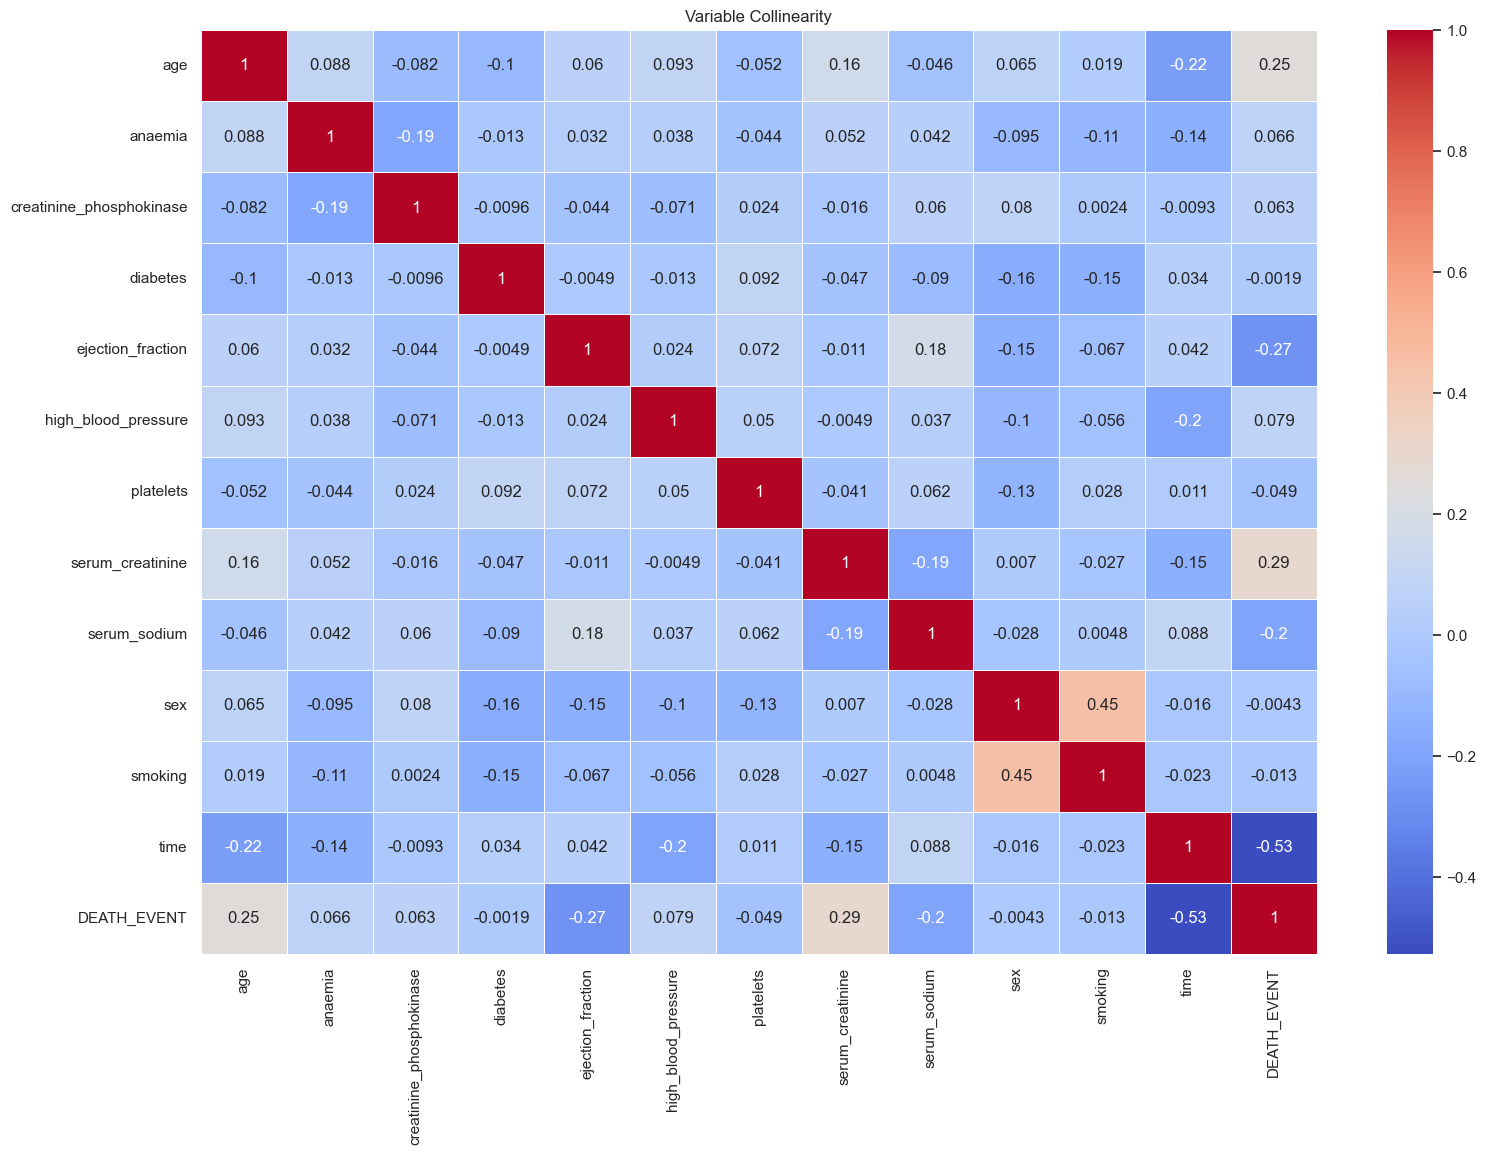

In [35]:
# Collinearity of variables
corr_mat = data.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr_mat, cmap='coolwarm', annot=True, linewidths=0.5)
plt.title("Variable Collinearity")
plt.show()

The correlation matrix shows generally **weak-to-moderate** linear relationships between features. No extreme collinearity.

**Key points**
- **Age → DEATH_EVENT:** moderate positive correlation (~**0.25**) — older patients have higher mortality.
- **Ejection Fraction → DEATH_EVENT:** moderate negative correlation (~**-0.27**) — lower EF strongly associated with death.
- **Serum Creatinine → DEATH_EVENT:** moderate positive correlation (~**0.29**) — impaired kidney function linked to worse outcomes.
- **Time → DEATH_EVENT:** strong negative correlation (~**-0.53**) — longer follow-up correlates with survival (shorter follow-up often reflects earlier death).

**Implication**
- No feature pairs show very high correlation (e.g., |r| > 0.8), so **multicollinearity is not a major concern** for most models.  
- Continue with standard preprocessing; consider monitoring VIF if you plan to use linear models where multicollinearity can affect coefficient stability.

In [17]:
# Check for multi-collinearity between features
feat_corr_mat = data[data.drop(columns=['DEATH_EVENT']).columns].corr()
upper_mat_triange = feat_corr_mat.where(np.triu(np.ones(feat_corr_mat.shape), k=1).astype(bool))
collinear = [col for col in upper_mat_triange.columns if any(upper_mat_triange[col] > 0.9)]
print("Variables with multi-collinearity:", len(collinear))

Variables with multi-collinearity: 0


## 3. Implement Support Vector Machine (SVM) with Scikit-Learn

In [18]:
# Separate features and target variable
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Create a pipeline with StandardScaler + LinearSVC
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(max_iter=5000, random_state=42))]
)

# Define hyperparameter grid for tuning
param_grid = {
    "svm__C": [0.001, 0.01, 0.1, 1, 10],
    "svm__penalty": ["l2"],
    "svm__loss": ["squared_hinge"]
}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit the grid search on the scaled training data
grid_search.fit(X_train, y_train)

# Display the best combination of hyperparameters and corresponding accuracy
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found: {'svm__C': 0.001, 'svm__loss': 'squared_hinge', 'svm__penalty': 'l2'}
Best cross-validation accuracy: 0.8367021276595745


- Trained a **LinearSVC** with standardized features (80/20 train-test split).  
- Performed **GridSearchCV** (5-fold) over `C` values; `penalty='l2'`, `loss='squared_hinge'`.  
- **Best parameters:** `C = 0.001`, `penalty = l2`, `loss = squared_hinge`.  
- **Best cross-validation accuracy:** **~83.67%**.

This indicates a well-regularized linear SVM generalizing reasonably on this dataset.  
Next: evaluate the best model on the test set and inspect detailed metrics (precision, recall, F1, confusion matrix).

In [19]:
# Retrieve the best SVM model from the grid search
best_svm = grid_search.best_estimator_

# Make predictions on the scaled test set
y_pred = best_svm.predict(X_test)

# Evaluate model performance on test data
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8166666666666667
F1 Score: 0.6451612903225806
Confusion Matrix:
 [[39  2]
 [ 9 10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88        41
           1       0.83      0.53      0.65        19

    accuracy                           0.82        60
   macro avg       0.82      0.74      0.76        60
weighted avg       0.82      0.82      0.80        60



The optimized **LinearSVM** model was evaluated on the test set after scaling.

- **Accuracy:** 0.82  
- **F1 Score:** 0.65 
- **Precision (Class 1 – Death):** 0.83 
- **Recall (Class 1 – Death):** 0.53  

**Confusion Matrix:**
```
[[39 2]
 [9 10]]
```

The model performs well in identifying **survivors (Class 0)** but struggles slightly with **death cases (Class 1)**, showing lower recall. 
 
Overall, it achieves a balanced performance, indicating that the linear kernel captures useful decision boundaries, though further optimization (e.g., nonlinear kernels or feature engineering) could improve minority class detection.

## Conclusion

This project demonstrated an end-to-end implementation of **Support Vector Machines (SVM)** for predicting heart failure death events, covering:

- Data exploration and preprocessing  
- Collinearity analysis  
- Model training with **LinearSVC**  
- Hyperparameter tuning using **GridSearchCV**  
- Model evaluation using multiple metrics  

The results indicate that a **well-regularized linear SVM** can achieve solid generalization performance on this medical dataset, making it a viable baseline model for clinical risk prediction tasks.